<a href="https://colab.research.google.com/github/iambaangkok/261459-Deep-Learning/blob/master/PyTorch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.__version__

'1.11.0+cu113'

# Create/Manipulate Tensor

## `torch.tensor()`

In [ ]:
a = [1,2,3]
ta = torch.tensor(a)  # param: dtype=torch.int32
print(ta)
print(f'{ta.dtype}, {ta.shape}')  # default: torch.int64 (for Int), torch.float32 (for Float)

b = [[1.,2,3],[3,4,5]]
tb = torch.tensor(b)  # param: dtype=torch.int32
print(tb)
print(f'{tb.dtype}, {tb.shape}')  # default: torch.int64 (for Int), torch.float32 (for Float)

tensor([1, 2, 3])
torch.int64, torch.Size([3])
tensor([[1., 2., 3.],
        [3., 4., 5.]])
torch.float32, torch.Size([2, 3])


## `torch.from_numpy()`

In [ ]:
a = np.array([1,2,3])
ta = torch.from_numpy(a) 
print(ta.dtype)  
print(ta)

torch.int64
tensor([1, 2, 3])


## `torch.ones()`, `torch.zeros()`

In [ ]:
t1 = torch.zeros(2,3)
t2 = torch.ones(2,3)
print(t1)
print(t2)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


## `torch.rand()`, `torch.normal()`

In [ ]:
torch.manual_seed(555)
t1 = torch.rand(2,3)  # Uniform [0,1)
t2 = torch.normal(mean=0, std=1, size=(2,3))
print(t1)
print(t2)

tensor([[0.7655, 0.4534, 0.2509],
        [0.1968, 0.7848, 0.0297]])
tensor([[-0.2347, -0.8334,  0.2043],
        [ 0.7167, -0.4552,  1.3794]])


## `tensor.arange()`

In [ ]:
t1 = torch.arange(10)
print(t1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
t1 = torch.arange(2,10)
print(t1)

tensor([2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
t1 = torch.arange(2,10, 3)
print(t1)

tensor([2, 5, 8])


In [ ]:
t1 = torch.arange(10,2, -2)
print(t1)

tensor([10,  8,  6,  4])


## `tensor.to()`

In [ ]:
t1 = torch.tensor([1,2,3])
new_t1 = t1.to(torch.float32)   # casting
print(f'casting {t1.dtype} --> {new_t1.dtype}')

casting torch.int64 --> torch.float32


In [ ]:
t1.to('cuda')   # copy to gpu

tensor([1, 2, 3], device='cuda:0')

## change tensor shape: transpose

In [ ]:
t1 = torch.tensor([[1,2,3],[4,5,6]])
print(t1)
t2 = torch.transpose(t1, 0, 1)
print(t2)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [ ]:
t1 = torch.tensor([[[1,2,3],[4,5,6]],
                   [[7,8,9],[10,11,12]]])
print(t1, end="\n\n")
t2 = torch.transpose(t1, 1, 2)  # swap dimension
print(t2)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

tensor([[[ 1,  4],
         [ 2,  5],
         [ 3,  6]],

        [[ 7, 10],
         [ 8, 11],
         [ 9, 12]]])


In [ ]:
t1 = torch.tensor([[[1,2,3],[4,5,6]],
                   [[7,8,9],[10,11,12]]])
print(t1, end="\n\n")
t2 = torch.transpose(t1, 0, 2)  # swap dimension
print(t2)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

tensor([[[ 1,  7],
         [ 4, 10]],

        [[ 2,  8],
         [ 5, 11]],

        [[ 3,  9],
         [ 6, 12]]])


## change tensor shape: reshape

In [ ]:
t1 = torch.tensor([[1,2,3],
                   [4,5,6]])   
t2 = torch.reshape(t1, (3,2))  
print(t1)  # shape (2,3)
print(t2)  # shape (3,2)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [ ]:
# or alternatively, use method in tensor
t1 = torch.tensor([[1,2,3],
                   [4,5,6]])   
t2 = t1.reshape(3,2) 
print(t1)  # shape (2,3)
print(t2)  # shape (3,2)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [ ]:
t1 = torch.tensor([[[1,2,3],[4,5,6]],
                   [[7,8,9],[10,11,12]]])
t2 = t1.reshape(3,-1,2) 
print(t1, end="\n\n")  # shape (2,2,3)
print(t2)  # shape (3,2,2)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])


In [ ]:
t1 = torch.arange(24) 
t2 = t1.reshape(3,2,2,2)  
print(t1, end="\n\n")  # shape (12,)  
print(t2)  # shape (3,2,2)  จะเห็นว่าเวลา reshape มันจะไล่ dimension ลึกสุดก่อน เป็นแถว

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])

tensor([[[[ 0,  1],
          [ 2,  3]],

         [[ 4,  5],
          [ 6,  7]]],


        [[[ 8,  9],
          [10, 11]],

         [[12, 13],
          [14, 15]]],


        [[[16, 17],
          [18, 19]],

         [[20, 21],
          [22, 23]]]])


In [ ]:
print(t2[0], end="\n\n")
print(t2[0,1], end="\n\n")
print(t2[0,1,:,1], end="\n\n")
print(t2[0,:,:,1], end="\n\n")  # Think about why we got the result (both shape and values)

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])

tensor([[4, 5],
        [6, 7]])

tensor([5, 7])

tensor([[1, 3],
        [5, 7]])



## change tensor shape: squeeze

In [ ]:
t1 = torch.tensor([[1,2,3]])
t2 = torch.squeeze(t1)
print(t1, t2)

tensor([[1, 2, 3]]) tensor([1, 2, 3])


In [ ]:
t1 = torch.tensor([[1,2,3]])
t2 = t1.squeeze()
print(t1, t2)

tensor([[1, 2, 3]]) tensor([1, 2, 3])


In [ ]:
t1 = torch.arange(12).reshape(3,2,1,1,2,1)
t2 = torch.squeeze(t1, 2)  # squeeze only certain dimension
print(t1.shape, t2.shape)

torch.Size([3, 2, 1, 1, 2, 1]) torch.Size([3, 2, 1, 2, 1])


## Split into multiple tensors

- torch.chunk()
- torch.split()

In [ ]:
t1 = torch.arange(24).reshape(4,3,2)
t2 = torch.chunk(t1, 2)  # give tuple (each chunk is a view)
print(type(t2))
for item in t2:
  print(item.shape)

<class 'tuple'>
torch.Size([2, 3, 2])
torch.Size([2, 3, 2])


In [ ]:
t1 = torch.arange(24).reshape(4,3,2)
t2 = torch.split(t1, [1,1,2])  # give tuple (each chunk is a view) # split also accepts int so it will work like torch.chunk()
print(type(t2))
for item in t2:
  print(item.shape)

<class 'tuple'>
torch.Size([1, 3, 2])
torch.Size([1, 3, 2])
torch.Size([2, 3, 2])


In [ ]:
t1 = torch.arange(24).reshape(3,4,2)
print(t1, end="\n\n")
t2 = torch.split(t1, [1,1,2], dim=1)  # give tuple (each chunk is a view)
print(type(t2))
for item in t2:
  print(item.shape)
  print(item, end="\n\n")

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]])

<class 'tuple'>
torch.Size([3, 1, 2])
tensor([[[ 0,  1]],

        [[ 8,  9]],

        [[16, 17]]])

torch.Size([3, 1, 2])
tensor([[[ 2,  3]],

        [[10, 11]],

        [[18, 19]]])

torch.Size([3, 2, 2])
tensor([[[ 4,  5],
         [ 6,  7]],

        [[12, 13],
         [14, 15]],

        [[20, 21],
         [22, 23]]])



## Combine multple tensors into one

- torch.cat()
- torch.stack()

In [ ]:
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([3,4,5])
print(torch.cat([t1, t2]))  # default param: axis = 0

tensor([1, 2, 3, 3, 4, 5])


In [ ]:
t1 = torch.tensor([[1,2],
                   [3,4]])
t2 = torch.ones(2,2)
print(torch.cat([t1, t2], axis=0))  
print(torch.cat([t1, t2], axis=1))  

tensor([[1., 2.],
        [3., 4.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 2., 1., 1.],
        [3., 4., 1., 1.]])


In [ ]:
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([3,4,5])
print(torch.stack([t1, t2], axis=0))  # like torch.cat() but along a new dimension
print(torch.stack([t1, t2], axis=1))  

tensor([[1, 2, 3],
        [3, 4, 5]])
tensor([[1, 3],
        [2, 4],
        [3, 5]])


In [ ]:
t1 = torch.tensor([[1,2],
                   [3,4]])
t2 = torch.ones(2,2)
print(torch.stack([t1, t2], axis=0))  
print(torch.stack([t1, t2], axis=1)) 

tensor([[[1., 2.],
         [3., 4.]],

        [[1., 1.],
         [1., 1.]]])
tensor([[[1., 2.],
         [1., 1.]],

        [[3., 4.],
         [1., 1.]]])



## Math operations

- torch.multiply()
- torch.mean(..., axis=0)
- torch.matmul()
- torch.linalg.norm(.., ord=2, dim=1)
 

# Create Dataset

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset

### DataLoader: Used to load dataset/list

In [ ]:
x = torch.arange(10, dtype=torch.float32)
data = DataLoader(x)
print(type(data))
for a in data:
  print(a)

<class 'torch.utils.data.dataloader.DataLoader'>
tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])
tensor([6.])
tensor([7.])
tensor([8.])
tensor([9.])


### TensorDataset: Convenient function

In [ ]:
x = torch.arange(10)
y = torch.arange(100,110)
data = TensorDataset(x,y)
print(type(data))
for (a,b) in data:
  print(a,b)

<class 'torch.utils.data.dataset.TensorDataset'>
tensor(0) tensor(100)
tensor(1) tensor(101)
tensor(2) tensor(102)
tensor(3) tensor(103)
tensor(4) tensor(104)
tensor(5) tensor(105)
tensor(6) tensor(106)
tensor(7) tensor(107)
tensor(8) tensor(108)
tensor(9) tensor(109)


### Dataset: Need subclassing

In [ ]:
class MyData(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y
  
  def __getitem__(self, index):
      return self.x[index], self.y[index]

  def __len__(self):
      return len(self.x)

x = torch.arange(10)
y = torch.arange(100,110)
data = MyData(x,y)
print(type(data))
for a,b in data:
  print(a,b)

<class '__main__.MyData'>
tensor(0) tensor(100)
tensor(1) tensor(101)
tensor(2) tensor(102)
tensor(3) tensor(103)
tensor(4) tensor(104)
tensor(5) tensor(105)
tensor(6) tensor(106)
tensor(7) tensor(107)
tensor(8) tensor(108)
tensor(9) tensor(109)


### Load dataset with Batch, shuffle, repeat

In [ ]:
x = torch.arange(10)
y = torch.arange(100,110)
myData = MyData(x,y)
dataLoader = DataLoader(dataset=myData, batch_size=2, shuffle=True)
for i, b in dataLoader:
  print(i, b)

tensor([5, 7]) tensor([105, 107])
tensor([0, 8]) tensor([100, 108])
tensor([4, 6]) tensor([104, 106])
tensor([1, 3]) tensor([101, 103])
tensor([9, 2]) tensor([109, 102])


In [ ]:
# or load multiple times
for epoch in range(3):
  print(f'epoch {epoch}:')
  for i, b in dataLoader:
    print(f' batch: x={i}, y={b}')

epoch 0:
 batch: x=tensor([4, 3]), y=tensor([104, 103])
 batch: x=tensor([9, 1]), y=tensor([109, 101])
 batch: x=tensor([2, 8]), y=tensor([102, 108])
 batch: x=tensor([7, 0]), y=tensor([107, 100])
 batch: x=tensor([5, 6]), y=tensor([105, 106])
epoch 1:
 batch: x=tensor([2, 8]), y=tensor([102, 108])
 batch: x=tensor([7, 3]), y=tensor([107, 103])
 batch: x=tensor([5, 1]), y=tensor([105, 101])
 batch: x=tensor([4, 9]), y=tensor([104, 109])
 batch: x=tensor([6, 0]), y=tensor([106, 100])
epoch 2:
 batch: x=tensor([2, 4]), y=tensor([102, 104])
 batch: x=tensor([9, 3]), y=tensor([109, 103])
 batch: x=tensor([8, 6]), y=tensor([108, 106])
 batch: x=tensor([7, 5]), y=tensor([107, 105])
 batch: x=tensor([1, 0]), y=tensor([101, 100])


# Load image dataset from files

Dataset http://ai.stanford.edu/~jkrause/cars/car_dataset.html

In [ ]:
!wget -c http://ai.stanford.edu/~jkrause/car196/bmw10_release.tgz
!tar zxf bmw10_release.tgz

--2022-04-24 07:59:41--  http://ai.stanford.edu/~jkrause/car196/bmw10_release.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
import pathlib
imgDir = pathlib.Path('bmw10_ims')
fileList = [(str(path), int(path.parts[1])) for path in imgDir.glob('*/*.jpg')]
imgPath, label  = list(zip(*fileList))
print('No. of images', len(fileList))

No. of images 489


In [ ]:
# Load image file from given path
import torchvision
from PIL import Image

class MyImageData(Dataset):
  def __init__(self, x, y):  # we also can add more default parameters to this constructor
    self.x = x   # actually, we can use pathlib to read image list here
    self.y = y
    self.transform = torchvision.transforms.Compose([
                  torchvision.transforms.ToTensor(), # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] 
                  torchvision.transforms.Resize((100,100)), # h, w but keep channel
                  ])
  
  def __getitem__(self, index):
      img = Image.open(self.x[index])
      img = self.transform(img)
      return img, self.y[index]

  def __len__(self):
      return len(self.x)

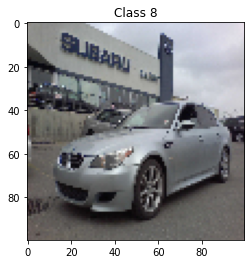

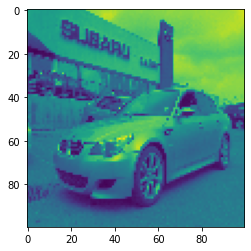

In [ ]:
import matplotlib.pyplot as plt

data = MyImageData(imgPath, label)
print('No. of images', len(data))  # it will call __len__()

img, label = data[0]   # the first image in the dataset (it will cal __getitem__())

fig, ax = plt.subplots(1,1)
ax.imshow(img.numpy().transpose(1,2,0))
ax.set_title(f'Class {label}')
plt.show()

fig, ax = plt.subplots(1,1)
ax.imshow(img[0].numpy())   # Only red channel
plt.show()